# Plot snippets

In [20]:
#23456789_123456789_123456789_123456789_123456789_123456789_123456789_12

---
## 1D signal example
- https://docs.scipy.org/doc/scipy-1.1.0/reference/tutorial/fftpack.html

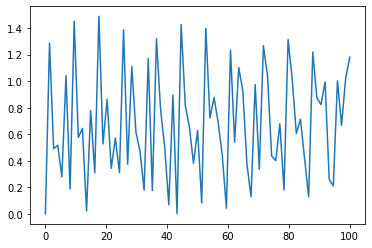

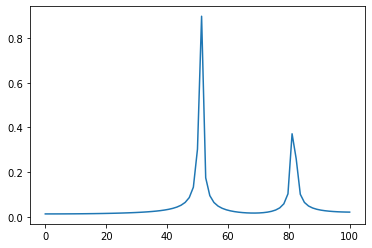

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 150          # number of sample points (600)
T = 1.0 / 200.0  # sample spacing (1/800)

x = np.linspace(0.0, N*T, N)  # start, stop, num evenly spaced samples
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
yf = np.fft.fft(y)

plt.plot(xf, np.abs(y[0:N//2]))
plt.show()
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.show()

---
## Srqt function
- https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

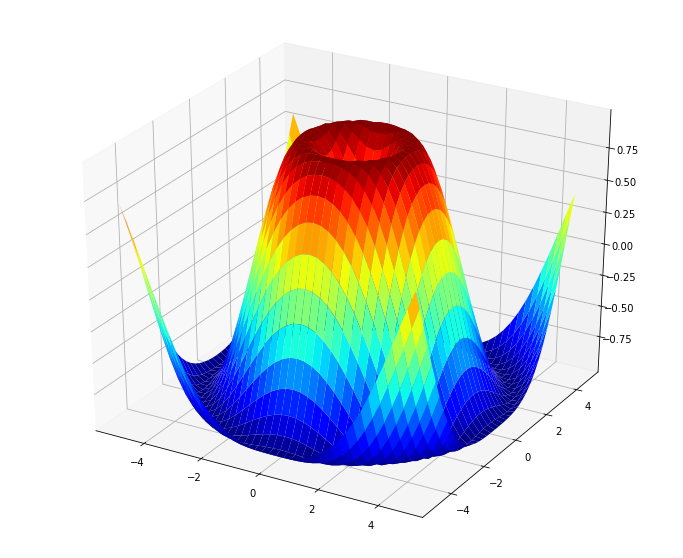

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make data
X = Y = np.arange(-5, 5, 0.25)
X, Y  = np.meshgrid(X, Y)
R     = np.sqrt(X**2 + Y**2)
Z     = np.sin(R)

# Plot the surface
p = plt.figure(figsize=(12, 10)).gca(projection='3d')
p.plot_surface(X, Y, Z, cmap='jet')
plt.show()

- https://medium.com/@praveenymcaust2k9/dont-miss-out-12-amazing-python-library-3fbcdba6e4e7

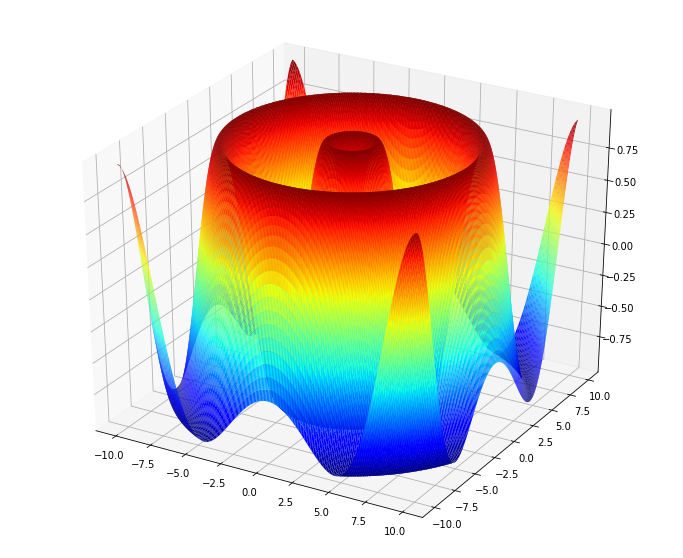

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Make data.
X = Y = np.arange(-10, 10, 0.1)
X, Y  = np.meshgrid(X, Y)
R     = np.sqrt(X**2 + Y**2)
Z     = np.sin(R)

# Plot the surface. coolwarm, inferno, bwr, jet, rainbow
p = plt.figure(figsize=(12, 10)).gca(projection='3d')
p.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet')
plt.show()

---
## Structured matrices
- https://github.com/oseledets/NLA/blob/master/lecture-9.ipynb

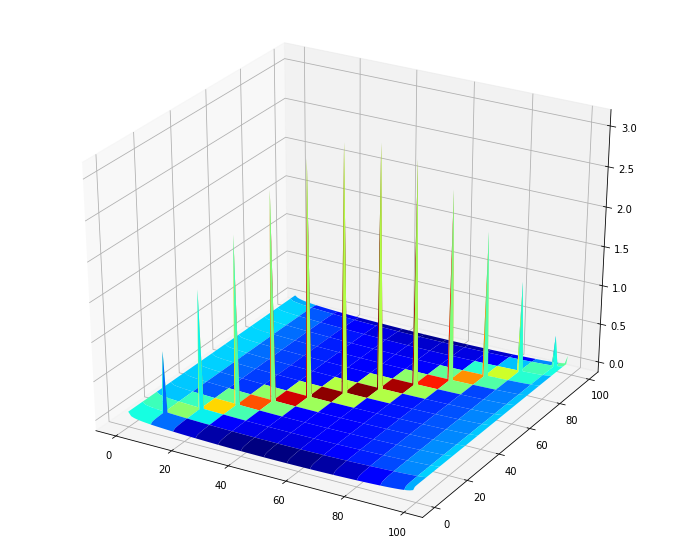

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 100
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
mm1 = np.fft.ifft(a, axis=0)
mm1 = np.fft.fft(mm1, axis=1)

t    = np.arange(n)
x, y = np.meshgrid(t, t)

ax = plt.figure(figsize=(12, 10)).gca(projection='3d')
ax.plot_surface(x, y, mm1.real, cmap='jet', rstride=8, cstride=8)
plt.show()

---
## FFT as a 3D-surface from a 2D-matrix
- https://stackoverflow.com/questions/56112328/configure-matplotlib-colorbar-to-match-3d-surface-values

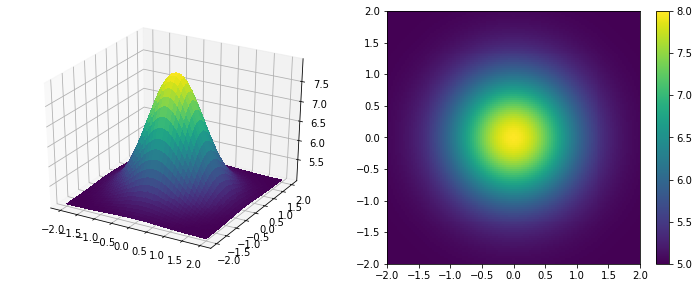

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(
       np.linspace(-2, 2, 128),
       np.linspace(-2, 2, 128),)
Z    = np.exp(-(X ** 2 + Y ** 2)) * 3 + 5

mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array(Z)
mappable.set_clim(5, 8) # optional

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm,
                 linewidth=0, antialiased=False)

ax2 = fig.add_subplot(122)
ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm, 
           extent=(np.min(X), np.max(X), np.min(Y), np.max(Y)),
                   interpolation='none')

plt.colorbar(mappable)
plt.tight_layout()

---
## Momentum spaces grids
- https://stackoverflow.com/questions/50314243/fourier-transform-in-python-2d/50316395#50316395

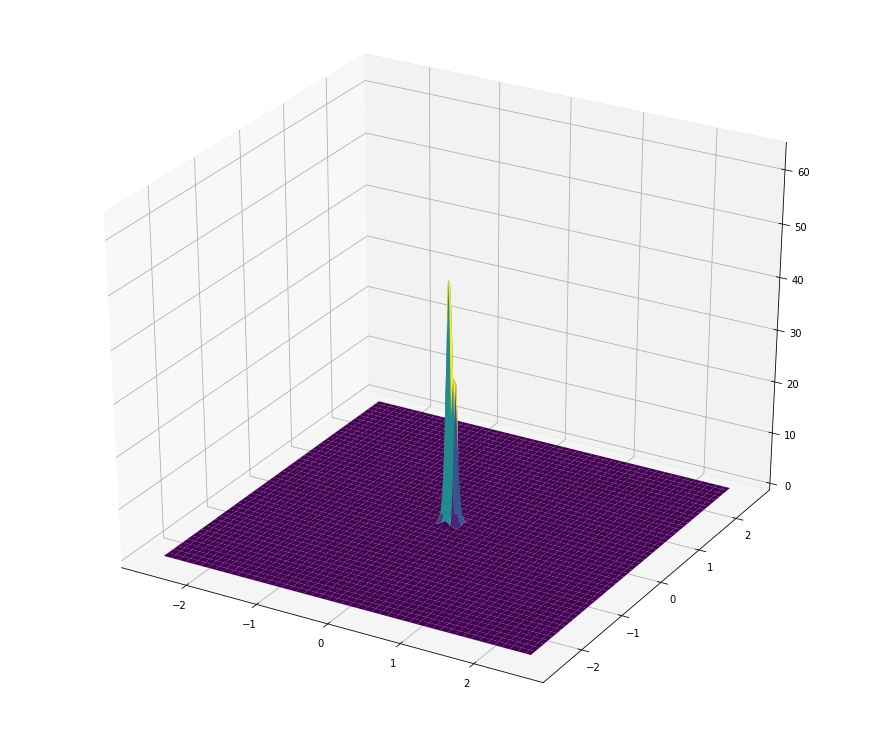

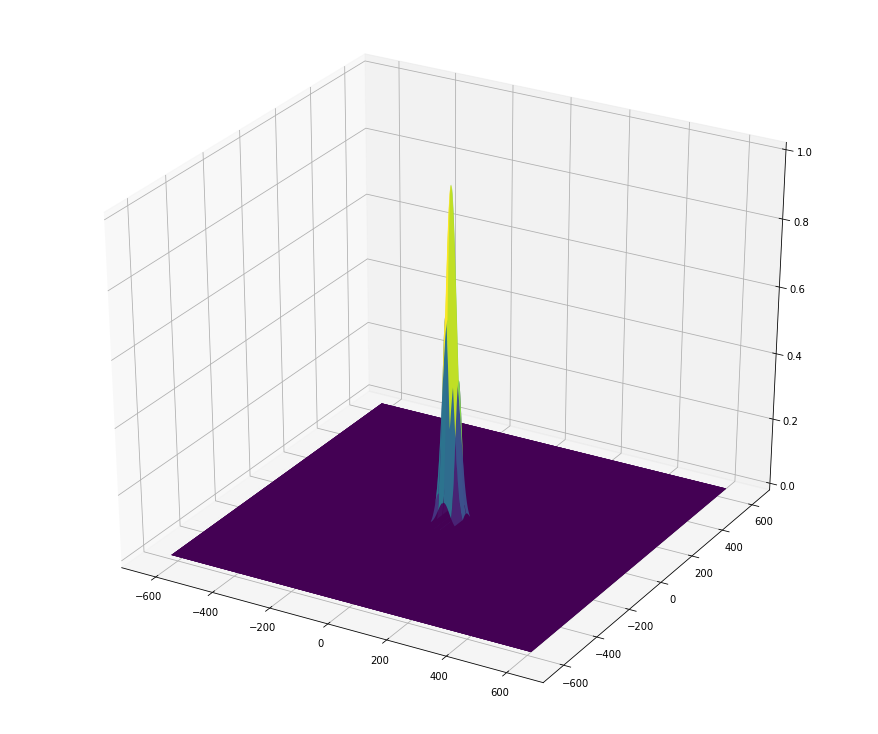

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.fftpack import fft2, ifft2

"""CREATING REAL AND MOMENTUM SPACES GRIDS"""
N_x, N_y = 2 ** 10, 2 ** 10
range_x, range_y = np.arange(N_x), np.arange(N_y)
dx, dy = 0.005, 0.005
# real space grid vectors
xv, yv = dx * (range_x - 0.5 * N_x), dy * (range_y - 0.5 * N_y)
dk_x, dk_y = np.pi / np.max(xv), np.pi / np.max(yv)
# momentum space grid vectors, shifted to center for zero frequency
k_xv, k_yv = ( dk_x * np.append(range_x[:N_x//2], -range_x[N_x//2:0:-1]),
         dk_y * np.append(range_y[:N_y//2], -range_y[N_y//2:0:-1]) )

# create real and momentum spaces grids
x, y   = np.meshgrid(xv, yv, sparse=False, indexing='ij')
kx, ky = np.meshgrid(k_xv, k_yv, sparse=False, indexing='ij')

"""FUNCTION"""
sigma=0.05
f = 1/(2*np.pi*sigma**2) * np.exp(-0.5 * (x ** 2 + y ** 2)/sigma**2)
F = fft2(f)

"""PLOTTING"""
Axes3D(plt.figure(figsize=(12, 10))).plot_surface(
    x, y, np.abs(f), cmap='viridis')
plt.show()
Axes3D(plt.figure(figsize=(12, 10))).plot_surface(
    kx, ky, np.abs(F)*dx*dy, cmap='viridis')
plt.show()

---
## Laplacian of Gaussian matrix
- https://yzhong-cs.medium.com/beyond-data-scientist-3d-plots-in-python-with-examples-2a8bd7aa654b

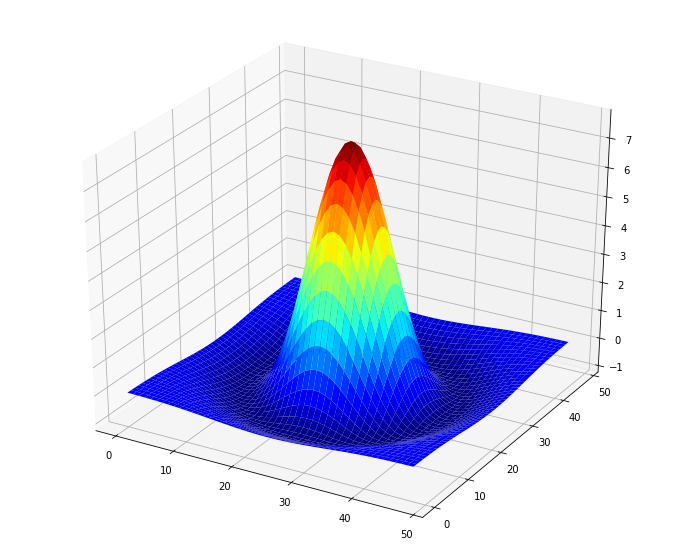

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def LoG(x, y, sigma):
    temp = (x ** 2 + y ** 2) / (2 * sigma ** 2)
    return -1 / (np.pi * sigma ** 4) * (1 - temp) * np.exp(-temp)

N = 49
X2, Y2 = np.meshgrid(range(N), range(N))
Z2 = -LoG(X2 - N//2, Y2 - N//2, sigma=8)*100000
X1 = np.reshape(X2, -1)
Y1 = np.reshape(Y2, -1)
Z1 = np.reshape(Z2, -1)

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X2, Y2, Z2, cmap='jet')
plt.show()

---
## Exp function
- http://mpastell.com/2013/05/02/matplotlib_colormaps/
- https://github.com/matplotlib/matplotlib/blob/81e8154dbba54ac1607b21b22984cabf7a6598fa/lib/matplotlib/mlab.py#L1866

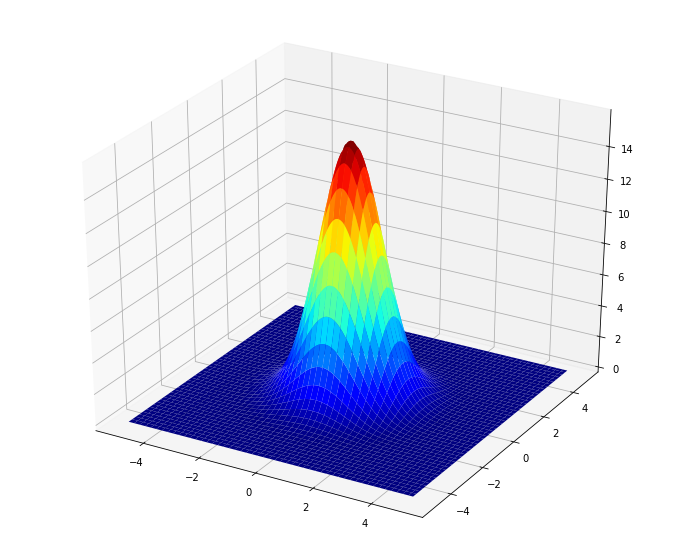

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = y = np.linspace(-5, 5, 200)
X,Y = np.meshgrid(x, y)
Z = np.exp(-(X**2 + Y**2)/2) / (2*np.pi) * 100

fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.show()

---
## Audio
- https://stackoverflow.com/questions/43425176/fft-of-wav-file-using-c-python

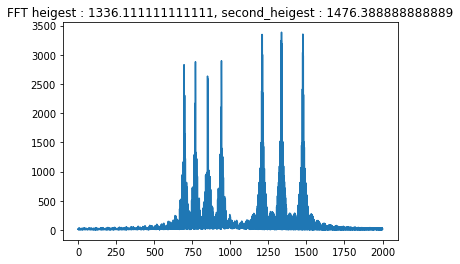

In [88]:
import sys
import numpy as np
from scipy.io.wavfile import read
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def do_fft(received_wave, Fs=44100):
    """
    :param received_wave: wave file data.
    :param Fs: Sampling Rate, default = 44100
    :return: [Frequency, Amplitude]
    """

    # Calculating the fft coeff and amp sqrt(x^2+y^2)
    fft_coeff   = np.fft.fft(received_wave)
    Amp         = np.sqrt(np.abs(fft_coeff))

    # Calulating size of recieved wave data and creating a
    # freq array based on sampling freq Fs and size
    size1=len(received_wave)
    freq=np.linspace(0,Fs,size1)

    # Taking only half sample based on Nyquist-Shannon sampling
    # theorem for ampiltude and frequency
    # <https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_
    #  theorem>
    Amplitude  = Amp[0:int(size1/2)]
    Frequency = freq[0:int(size1/2)]

    # This shorts the  index of the array in acending order
    idx = np.argsort(Amplitude)
    # freq1 is the maximum freq freq2 second maximum and so on
    freq1 = ((idx[-1]) / float(size1)) * Fs  
    freq2 = ((idx[-2]) / float(size1)) * Fs
    freq3 = ((idx[-3]) / float(size1)) * Fs

    return Amplitude, Frequency, freq1, freq2, freq3


def read_from_file(file_location):
    """
    Read file ad return audio data
    :param file_location: location of file.
    :return: audio data
    """

    data = read(file_location)

    # as scipy read function return two array
    # [sample_rate_of_file, [audio_chunks]]
    sample_rate, audio_data = data
    return sample_rate, audio_data


# read audio chunks from audio file
sample_rate, audio_data = read_from_file("dtmf.wav")

# call do_fft() function to get fft ( frequency and amplitude)
Amplitude, Frequency, freq1, freq2, freq3 = do_fft(
    received_wave=audio_data, Fs=sample_rate)

# plot fft
plt.title("FFT heigest : {}, second_heigest : {}".
          format(freq1, freq2))
plt.plot(Frequency, Amplitude)
plt.show()
plt.close()

---
## Spectrogram
- https://stackoverflow.com/questions/56788798/python-spectrogram-in-3d-like-matlabs-spectrogram-function

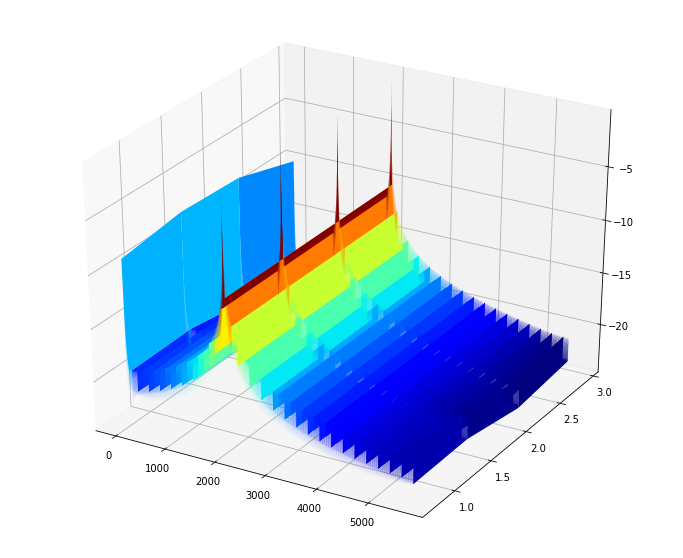

In [21]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as p
from mpl_toolkits.mplot3d import Axes3D

fs = 11240.
t = 4.
time = np.arange(fs*t) / fs
frequency = 2000.
mysignal = np.sin(2.0 * np.pi * frequency * time)

f, t, Sxx = signal.spectrogram(
    mysignal, fs, nperseg = 2**14, noverlap = 2**13)

#myfilter = (f>800) & (f<1200)
#f = f[myfilter]
#Sxx = Sxx[myfilter, ...]

ax = p.figure(figsize=(12, 10)).gca(projection='3d')
ax.plot_surface(f[:, None], t[None, :],
                np.log10(Sxx), cmap='jet')
p.show()

---
## Wireframe
- https://www.xspdf.com/help/50979283.html

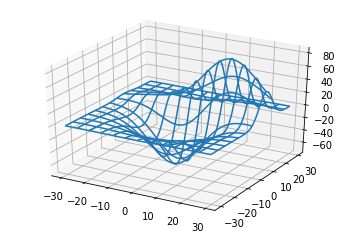

In [22]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

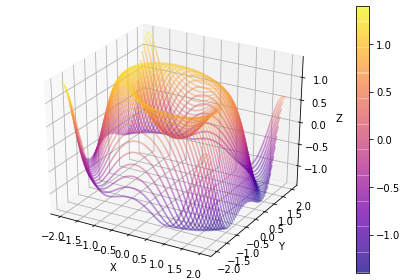

In [25]:
import numpy as np; import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
def waterfall_plot(fig,ax,X,Y,Z,**kwargs):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        Z : n,m numpy array. Must be a 2d array even if only one line should be plotted
        X,Y : n,m array
        kwargs : kwargs are directly passed to the LineCollection object
    '''
    # Set normalization to the same values for all plots
    norm = plt.Normalize(Z.min().min(), Z.max().max())
    # Check sizes to loop always over the smallest dimension
    n,m = Z.shape
    if n>m:
        X=X.T; Y=Y.T; Z=Z.T
        m,n = n,m

    for j in range(n):
        # reshape the X,Z into pairs 
        points = np.array([X[j,:], Z[j,:]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)  
        # The values used by the colormap are the input to the array parameter
        lc = LineCollection(segments, cmap='plasma', norm=norm, array=(Z[j,1:]+Z[j,:-1])/2, **kwargs)
        line = ax.add_collection3d(lc,zs=(Y[j,1:]+Y[j,:-1])/2, zdir='y') # add line to axes

    fig.colorbar(lc) # add colorbar, as the normalization is the same for all
    # it doesent matter which of the lc objects we use
    ax.auto_scale_xyz(X,Y,Z) # set axis limits
x = np.linspace(-2,2, 500)
y = np.linspace(-2,2, 60)
X,Y = np.meshgrid(x,y)
Z = np.sin(X**2+Y**2)-.2*X
# Generate waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
waterfall_plot(fig,ax,X,Y,Z,linewidth=1.5,alpha=0.5) 
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z') 
fig.tight_layout()